In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_palette('bright')

In [5]:
data = pd.read_csv(r'C:\Users\acer\OneDrive\Desktop\crop recommendations\Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


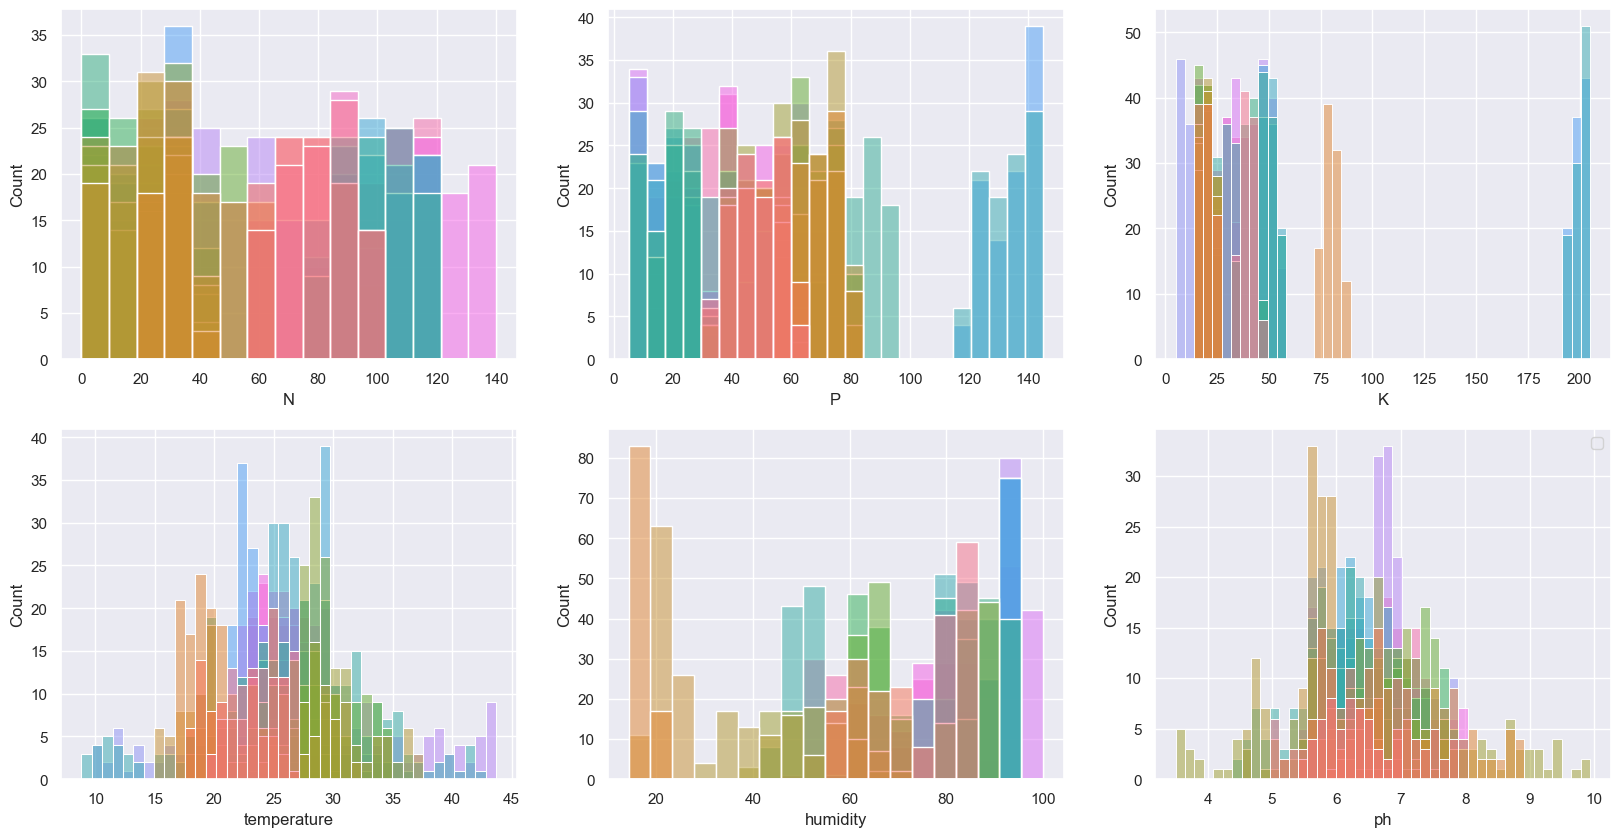

In [4]:
fig, axes = plt.subplots(2,3,figsize=(20,10))

for col, ax in zip(data.columns, axes.flatten()):
    sns.histplot(data=data, x=col, hue='label', ax=ax, legend=False)
plt.legend(loc='upper right')

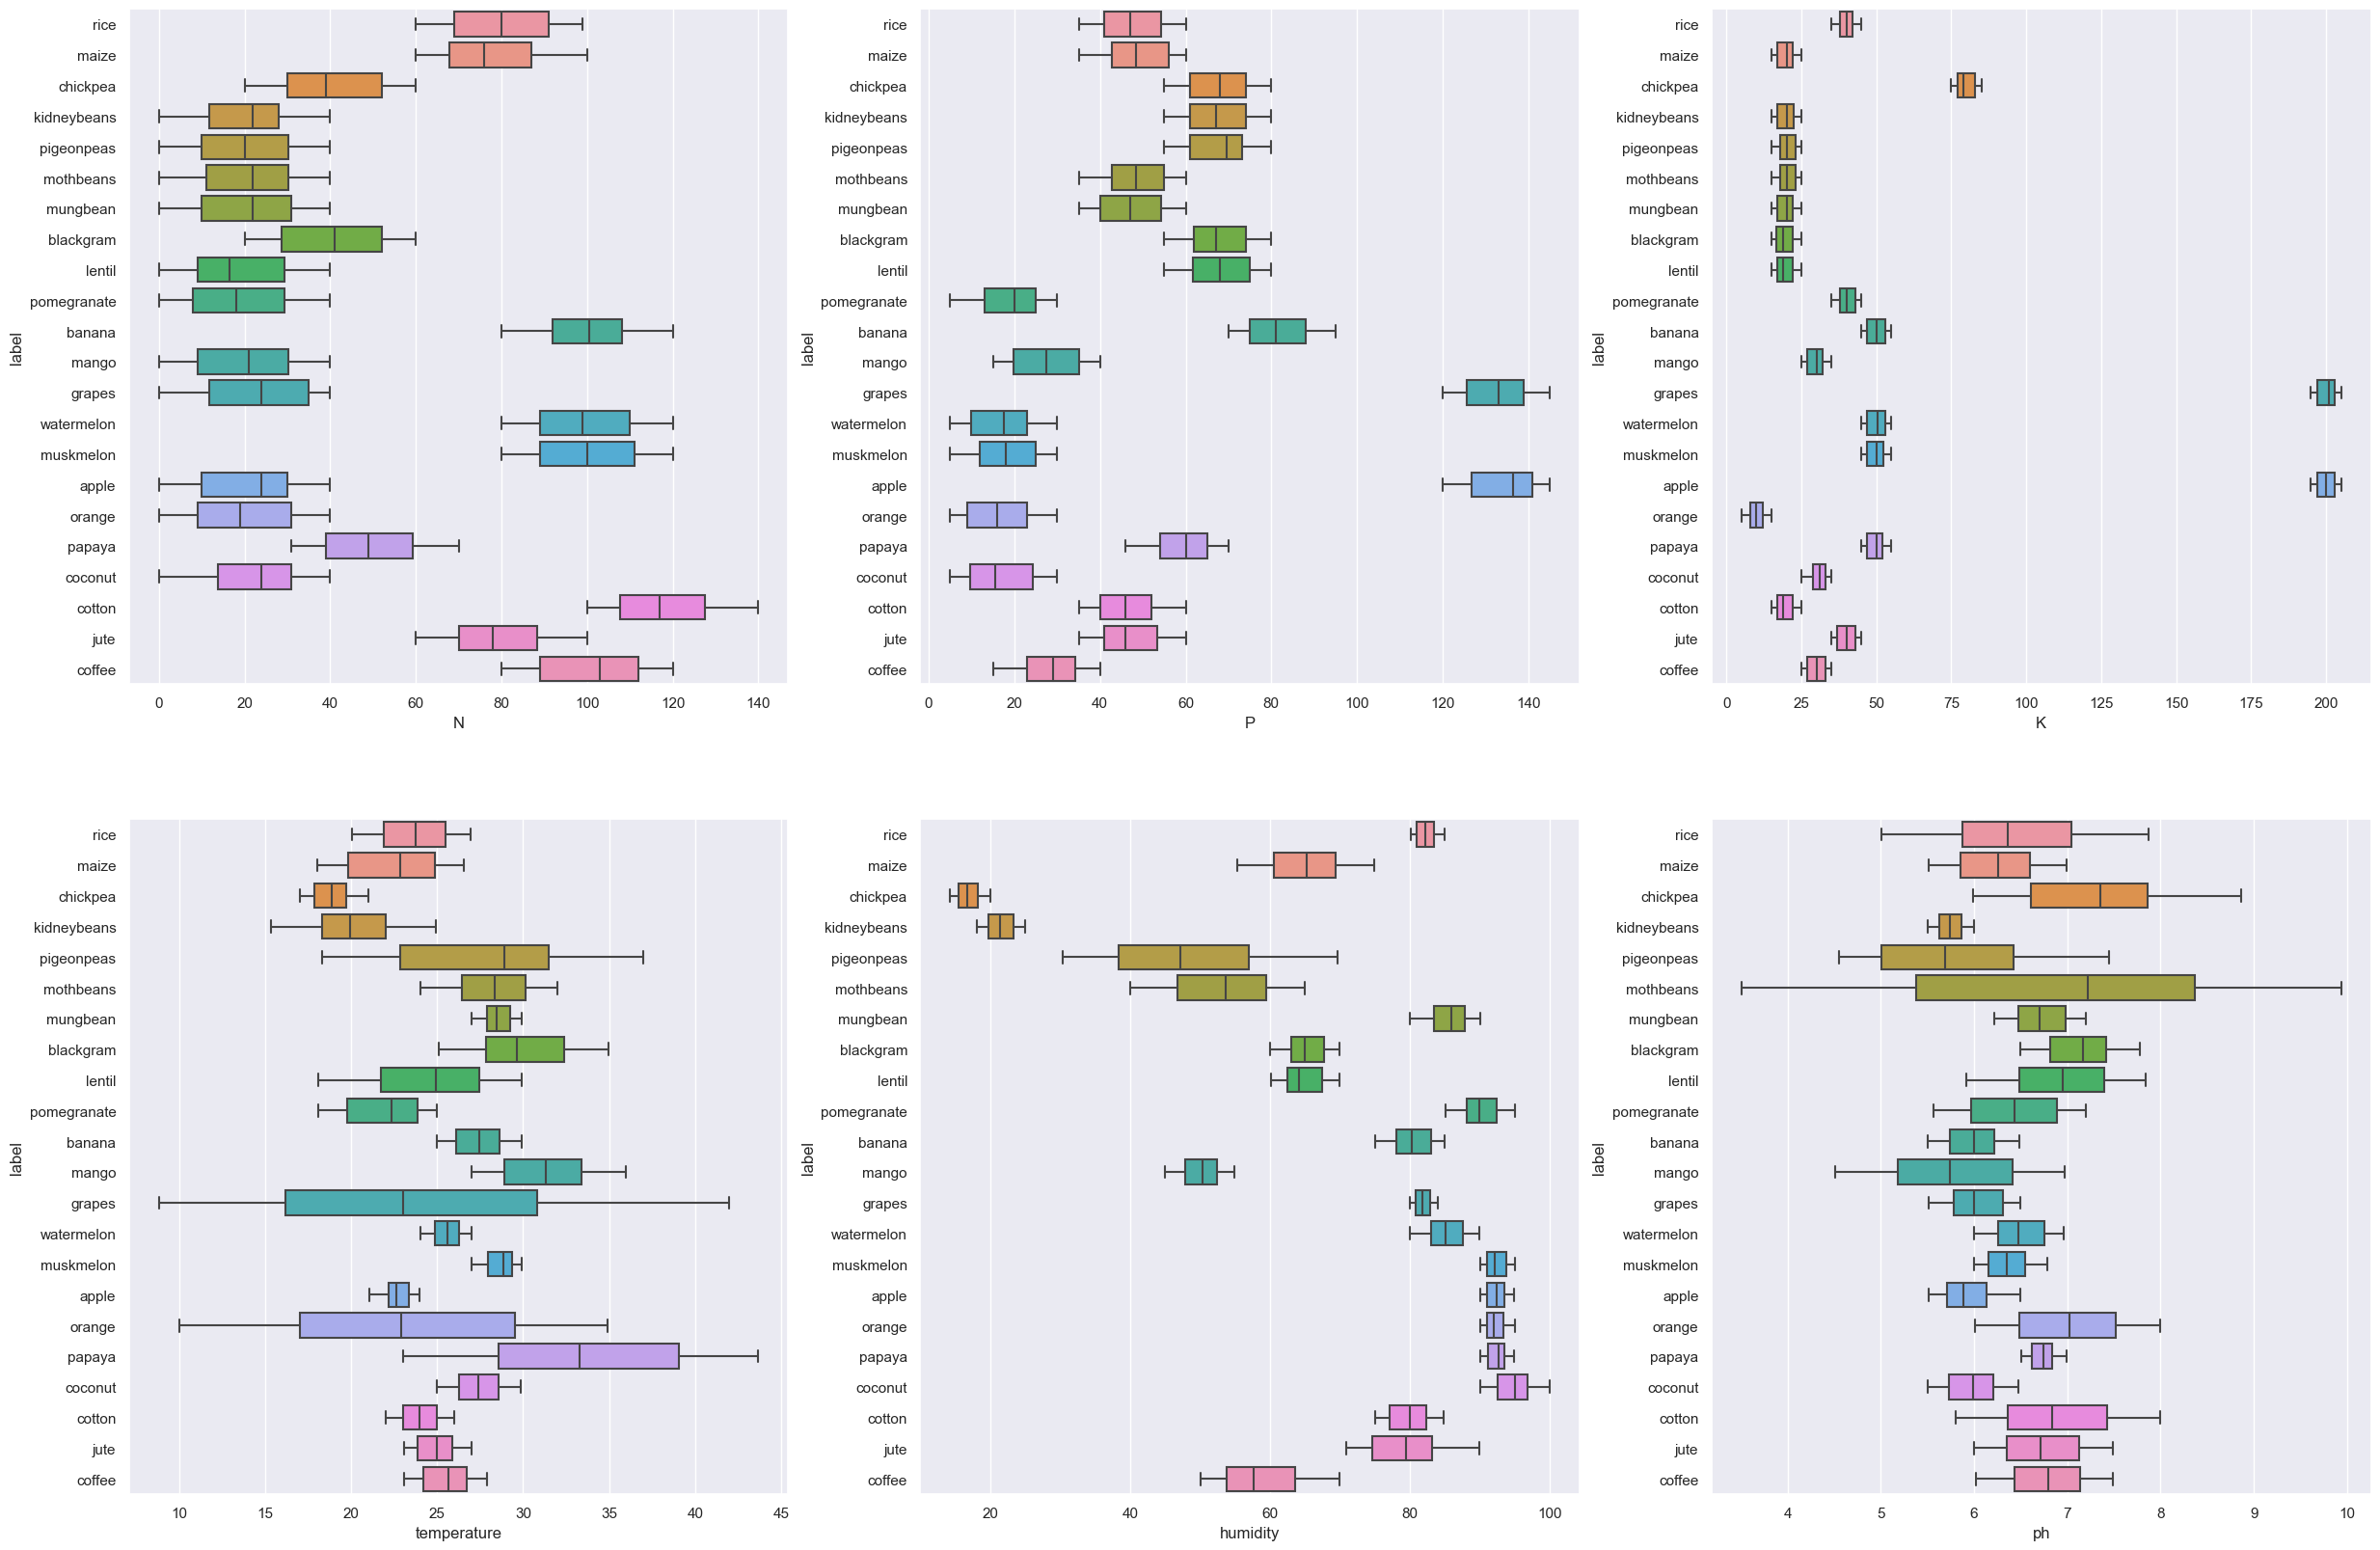

In [5]:
fig, axes = plt.subplots(2,3,figsize=(30,20))

for col, ax in zip(data.columns, axes.flatten()):
    sns.boxplot(data=data, x=col, y='label', ax=ax)
    

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

multiclass_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Multilayer Perceptron': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False, iterations=500, depth=10, learning_rate=0.05, loss_function='MultiClass'),
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true,y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro')
}

le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

NameError: name 'data' is not defined

In [7]:
X = data.drop(['label'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [8]:
fitted_models = {}
model_names = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','AdaBoost','Bagging','SVM','K-Nearest Neighbors','Naive Bayes','Multilayer Perceptron','XGBoost','LightGBM','CatBoost']
scored_metrics = {model_name: {'Accuracy': None, 'Precision': None, 'Recall': None} for model_name in model_names}

for model_name, model in multiclass_models.items():
    fitted_models[model_name] = model.fit(X_train, y_train)
    for metric_name, metric in metrics.items():
        scored_metrics[model_name][metric_name] = metric(y_test, model.predict(X_test))

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.134845
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.180655
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.120030
[LightGB

In [9]:
pd.DataFrame(scored_metrics).style.background_gradient(cmap='Greens')

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Bagging,SVM,K-Nearest Neighbors,Naive Bayes,Multilayer Perceptron,XGBoost,LightGBM,CatBoost
Accuracy,0.948485,0.986364,0.992424,0.983333,0.210606,0.986364,0.963636,0.977273,0.857576,0.956061,0.980303,0.975758,0.989394
Precision,0.949356,0.986561,0.994172,0.984426,0.156670,0.986902,0.967747,0.979634,0.863305,0.958699,0.983368,0.978906,0.991498
Recall,0.948391,0.986536,0.991883,0.983381,0.227273,0.986752,0.964396,0.977677,0.866754,0.955373,0.979940,0.976360,0.989031
